# Implementing Logistic Regression
Mihir Singh

## Abstract
The code for the logistic regression model can be found [here](https://github.com/mihirBSingh/mihirBSingh.github.io/blob/main/posts/logistic-regression/logistic.py).

This blog post first implements a logistic regression model with vanilla and spicy gradient descent. I then conducted experiments using this implementation. First, I found that vanilla gradient descent eventually converged on a weight that accurately separated the data it was classifying and that the loss of the model decreased monotonically. Then, I found that spicy gradient descent converged faster than vanilla gradient descent after adjusting my learning rate. Finally, I fit my model on training data with more features than data points and consequently found that I had overfit my model to my training data, receiving a much lower accuracy when applying the model over testing data. Through this process, I was able to gain a better understanding of logistic regression and gradient descent as well as recognize the disadvantages of overfitting a model and the advantages of gradient descent with momentum.

### Metadata Block

In [309]:
# metadata
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer
import torch
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experiments
In order to perform any experiments, we will first generate data for a classification problem.

In [310]:
def classification_data(n_points = 300, noise = 0.3, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)

Before running any experiments, we should also take a look at the data we will be using. We can also create some functions that'll help us evaluate our models.

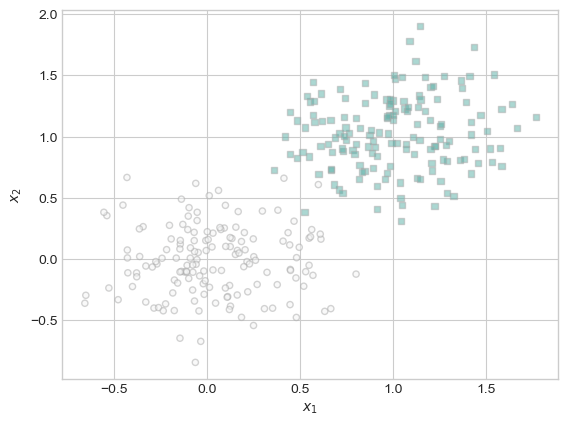

In [311]:
# function to plot data - from Professor Phil Chodrow
def plot_data(X, y, ax):
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

# function to plot data - from Professor Phil Chodrow
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)
    
# function to determine accuracy of logistic regression models
def accuracy(model, X, y):
    return torch.mean((1.0*(model.predict(X) == y)))
    
fig, ax = plt.subplots(1, 1)

X, y = classification_data()
plot_data(X, y, ax)

Now we can create our models and implement a gradient descent loop.

In [312]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

for _ in range(100):
    # add other stuff to e.g. keep track of the loss over time. 
    opt.step(X, y, alpha = 0.1, beta = 0.9)

### Vanilla Gradient Descent
Our first experiment will be focused on vanilla gradient descent. If alpha is sufficiently small and beta = 0, then our logistic regression algorithm should converge to a weight vector w that looks correct visually. 

In [313]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

lossVec = []
for _ in range(2500):
    # add other stuff to e.g. keep track of the loss over time. 
    loss = opt.step(X, y, alpha = 0.1, beta = 0)
    lossVec.append(loss)

After this loop, we can now plot our decision boundary and check how accurate our model is.

accuracy is: tensor(0.9900)


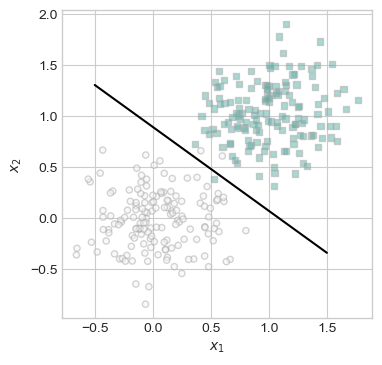

In [314]:
# plot decision regions
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_data(X, y, ax)
w = LR.w
draw_line(w, -0.5, 1.5, ax, color = "black", label = r"$w^{(0)}$")

# find accuracy
acc = accuracy(LR, X, y)
print("accuracy is:", acc)

Our model is pretty accurate with an accuracy of 99%. Over more iterations it could even perfectly divide the data. Let's see how the model improves over time by looking at the loss over each iteration of our training loop.

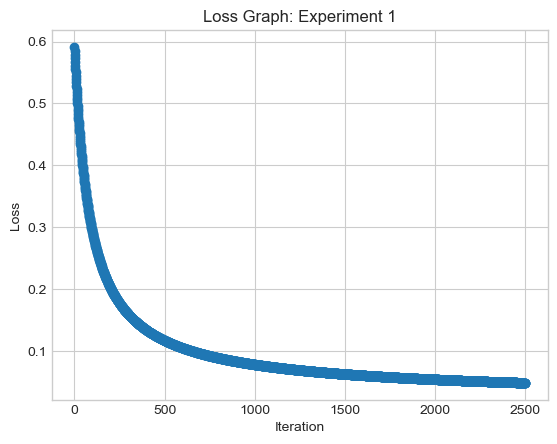

final loss:  tensor(0.0488)


In [315]:
# plotting loss
def loss_graph(loss_vec):
    plt.plot(loss_vec, marker='o', linestyle='-')
    plt.title('Loss Graph: Experiment 1')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()
    print("final loss: ", loss_vec[len(loss_vec)-1])

loss_graph(loss_vec=lossVec)

Our loss decreases over time and gets closer to converging to a loss of 0. This graph shows that our model is working properly and adjusting its weight accordingly in order to get the right answer.

### Benefits of Momentum
Now we can implement gradient descent with momentum into our training loop. If our beta = 0.9 and we modify our alpha, we should be able to see that our model will converge to the correct weight vector in fewer iterations than vanilla gradient descent.

accuracy is: tensor(0.9900)


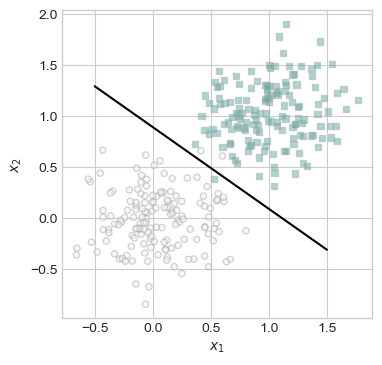

In [316]:
# train the model with momentum
LRM = LogisticRegression() 
optM = GradientDescentOptimizer(LRM)

lossVecM = []
for _ in range(2500):
    # add other stuff to e.g. keep track of the loss over time. 
    loss = optM.step(X, y, alpha = 0.15, beta = 0.9)
    lossVecM.append(loss)
    
# plot decision regions
fig, ax = plt.subplots(1,1, figsize = (4, 4))
plot_data(X, y, ax)
w = LRM.w
draw_line(w, -0.5, 1.5, ax, color = "black", label = r"$w^{(0)}$")

# find accuracy
acc = accuracy(LRM, X, y)
print("accuracy is:", acc)

We see that after the same number of iterations, our model reaches the same accuracy.

Text(0.5, 1.0, 'Vanilla vs Momentum Gradient Descent Loss Over Time')

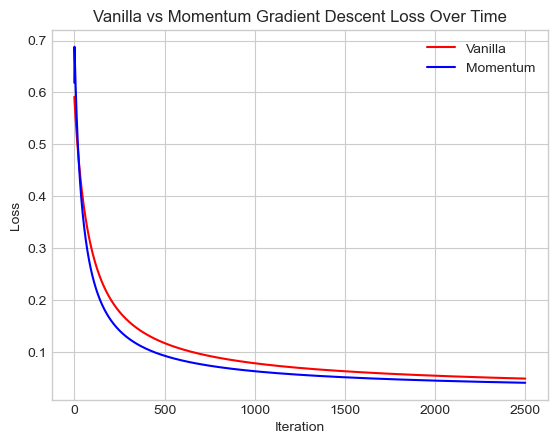

In [317]:
plt.plot(lossVec, color = "red", label='Vanilla')
plt.plot(lossVecM, color = "blue", label='Momentum')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Vanilla vs Momentum Gradient Descent Loss Over Time")

After modifying our alpha so that it is now 0.25, we find that we can indeed make it so that our model implementing momentum converges slightly faster than a model implementing vanilla gradient descent. We see this because our loss with the model implementing momentum decreases at a faster rate and thus converges sooner.

### Overfitting
Our last experiment will require data where the number of features is larger than the number of points. We will seek to overfit our model by obtaining 100% accuracy for our model on training data, but a much worse accuracy when we apply the model on test data.

In [318]:
# generate training data
X_train, y_train = classification_data(n_points = 50, noise = 0.5, p_dims = 100)

# generate testing data
X_test, y_test = classification_data(n_points = 50, noise = 0.5, p_dims = 100)

With our data generated, we can now begin training our model with the training data.

In [319]:
LRE = LogisticRegression() 
optE = GradientDescentOptimizer(LRE)

# training our model 
lossVecE = []
accuracies_train = []
accuracies_test = []
for _ in range(2500):
    # add other stuff to e.g. keep track of the loss over time. 
    loss = optE.step(X_train, y_train, alpha = 0.25, beta = 0.9)
    lossVecE.append(loss)
    
    # from accuracy function - need array though so slight modification
    accuracies_train.append((1.0*(LRE.predict(X_train) == y_train)).mean())
    accuracies_test.append((1.0*(LRE.predict(X_test) == y_test)).mean())   
    
# find accuracy over training data
acc = accuracy(LRE, X_train, y_train)
print("training accuracy is:", acc)

acc = accuracy(LRE, X_test, y_test)
print("test accuracy is:", acc)

training accuracy is: tensor(1.)
test accuracy is: tensor(0.9200)


Our model achieves perfect accuracy when classifying the training data. However, it is only 92% accurate when looking at the testing data. This is the lowest accuracy we have arrived at so far. We can take a look at the accuracy over time for each dataset.

Text(0.5, 1.0, 'Vanilla vs Momentum Gradient Descent Loss Over Time')

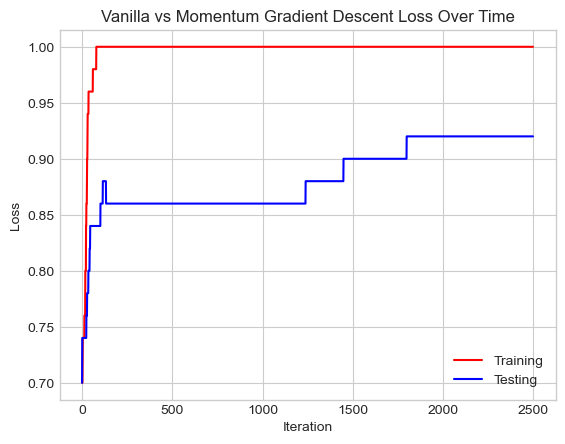

In [320]:
plt.plot(accuracies_train, color = "red", label='Training')
plt.plot(accuracies_test, color = "blue", label='Testing')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Vanilla vs Momentum Gradient Descent Loss Over Time")

 From looking at this graph we see that our model underperformed when looking at the testing data at any iteration. Our results indicates that we have overfit our model on the training data and that our model will not be accurate when asked to classify other data.

 ## Discussion
 Logistic regression works by continuously updating its weight(s) based upon a process of gradient descent. Vanilla gradient descent can be quite accurate, but if you adjust your learning rate and implement a process called gradient descent with momentum, you can converge on an accurate answer even faster. However, if you have more features than data points, you may overfit your model to your training data and consequently receive a much lower accuracy when applying the model over testing data. Through this blog post, I was able to learn about the implementation of logistic regression and gradient descent with momentum. I also recognized how you can overfit your model with training data with more features than data points and saw the benefits of spicy gradient descent. Through this blog post, I developed a better understanding of the popular data science technique that is logistic regression.